<a href="https://colab.research.google.com/github/MukiiriKoome/TensorFlow/blob/master/hypertunedCNN(basic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image classification using CNN with the CIFAR-10 Dataset

In [1]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.0 MB/s eta 0:00:00


In [2]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras_tuner.tuners import RandomSearch

In [3]:
# Loading and preprocessing the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
# Defining the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Definition of function to build the model
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(filters=hp.Int('filters', min_value=32, max_value=128, step=16),
                            kernel_size=hp.Choice('kernel_size', values=[3, 5]),
                            activation='relu',
                            input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(filters=hp.Int('filters', min_value=32, max_value=128, step=16),
                            kernel_size=hp.Choice('kernel_size', values=[3, 5]),
                            activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(filters=hp.Int('filters', min_value=32, max_value=128, step=16),
                            kernel_size=hp.Choice('kernel_size', values=[3, 5]),
                            activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10))

    # Choose an optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    # Compile the model
    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

In [6]:
# Define the tuner
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=10, executions_per_trial=1, directory='output', project_name='cifar10_tunning')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Perfirm the hyperparameter Search
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Trial 10 Complete [00h 00m 41s]
val_accuracy: 0.5698000192642212

Best val_accuracy So Far: 0.6823999881744385
Total elapsed time: 00h 09m 52s


In [10]:
# Get the best hyperparameters from the search
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [11]:
# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3257 - loss: 1.8093 - val_accuracy: 0.5449 - val_loss: 1.2797
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5528 - loss: 1.2555 - val_accuracy: 0.6099 - val_loss: 1.1106
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6211 - loss: 1.0795 - val_accuracy: 0.6542 - val_loss: 0.9974
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6602 - loss: 0.9743 - val_accuracy: 0.6532 - val_loss: 0.9845
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6830 - loss: 0.8991 - val_accuracy: 0.6776 - val_loss: 0.9132
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7057 - loss: 0.8329 - val_accuracy: 0.6884 - val_loss: 0.9094
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7195 - loss: 0.7947 - val_accuracy: 0.7054 - val_loss: 0.8566
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7376 - loss: 0.752

In [12]:
# Evaluating the performance of the CNN model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n The accuracy of the model is {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.7090 - loss: 0.8538

 The accuracy of the model is 0.7089999914169312


Text(0.5, 1.0, 'Training and Validation Loss')

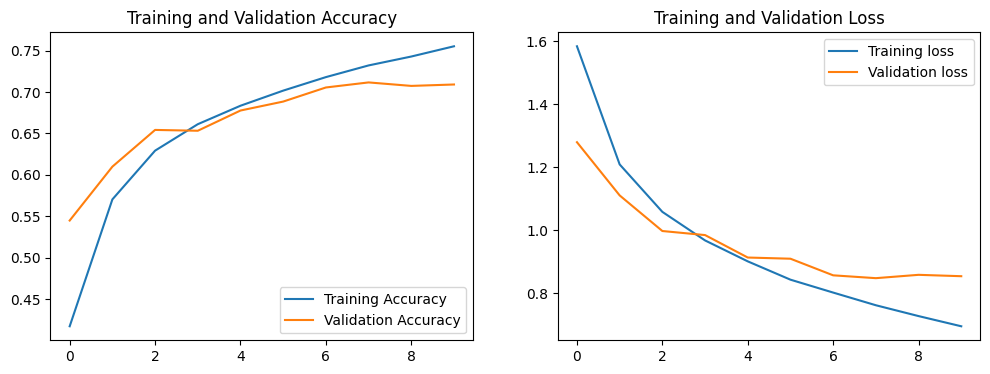

In [13]:
# Plotting the training and validation accuracy and loss values
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')